# Imports

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [16]:
data = pd.read_csv('202507.csv')
data.head()

C:\Users\laptop\AppData\Local\Temp\ipykernel_36176\3468665871.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('202507.csv')


,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items
0,220115309.1752422794,begin_checkout,1752423096054409,1752422794,5559.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,10.0,1.0
1,220115309.1752422794,add_shipping_info,1752423126644026,1752422794,382.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,10.0,1.0
2,220115309.1752422794,begin_checkout,1752423413716235,1752422794,15.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,10.0,1.0
3,220115309.1752422794,view_cart,1752423429261180,1752422794,1.0,1.0,NaN,https://www.magidglove.com/checkout/cart/,NaN,(direct),(none),(direct),mobile,10.0,1.0
4,220115309.1752422794,add_shipping_info,1752423551093026,1752422794,17648.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,12.0,1.0


In [17]:
data.shape

(1520101, 15)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520101 entries, 0 to 1520100
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   user_pseudo_id           1520101 non-null  object 
 1   event_name               1520101 non-null  object 
 2   event_timestamp          1520101 non-null  int64  
 3   session_id               1520101 non-null  int64  
 4   session_engagement_time  755953 non-null   float64
 5   engaged_session_event    1175400 non-null  float64
 6   session_engaged          59356 non-null    float64
 7   page_location            1520101 non-null  object 
 8   customer_type            330893 non-null   object 
 9   traffic_source_name      1502493 non-null  object 
 10  traffic_source_medium    1518265 non-null  object 
 11  traffic_source           1519230 non-null  object 
 12  device_category          1520101 non-null  object 
 13  total_item_quantity      147803 non-null  

In [19]:
# check how many unique users are in the dataset
data['user_pseudo_id'].nunique(), data['user_pseudo_id'].count()

(159591, np.int64(1520101))

In [20]:
# check how many unique sessions are in the dataset
data['session_id'].nunique(), data['session_id'].count()

(130865, np.int64(1520101))

In [21]:
# check all the unique event names in the dataset
data['event_name'].unique()

array(['begin_checkout', 'add_shipping_info', 'view_cart', 'add_to_cart',
       'add_payment_info', 'purchase', 'CustomerLoggedInSession',
       'view_item', 'page_view', 'first_visit', 'ad_nav_click',
       'user_engagement', 'session_start', 'view_search_results',
       'scroll', 'click', 'product_spec_click', 'remove_from_cart',
       'ad_portal_add_to_cart', 'ad_order_selected', 'file_download',
       'view_item_list', 'select_item', 'account_all_clicks',
       'store_product_spec_sheet_view', 'hubspot_form_submit',
       'account_order_selected', 'user_session',
       'store_contact_us_submit', 'account_edit_user',
       'contact_form_submit', 'ad_portal_search', 'hs_form_submission',
       'ad_invoice_modal', 'ad_add_address', 'ad_update_address',
       'ad_add_user', 'ad_apply_search_filters', 'ad_delete_address',
       'ad_delete_user', 'ad_edit_user', 'ad_sort',
       'ad_order_tracking_modal', 'account_order_search',
       'account_add_user', 'account_add_addre

# Data Cleaning

1. Filter out users who have not been converted

In [36]:
# list the user_pseudo_ids of users who have been converted
converted_users = data[data['event_name'] == 'purchase']['user_pseudo_id'].unique()
converted_users.shape

(2877,)

In [35]:
data[data['event_name'] == 'purchase'][['user_pseudo_id', 'event_name']].head()

,user_pseudo_id,event_name
44,68566386.1738696361,purchase
2801,1752086349.1710780155,purchase
2828,1886977025.1751493919,purchase
12966,82N6QLGjeBgyhc9CqY27Bq6b8CFHNF0Ir4ybGeqWtpQ=.1...,purchase
12979,2043014512.1753336646,purchase


In [37]:
# keep only the users who have been converted
data_converted = data[data['user_pseudo_id'].isin(converted_users)]
data_converted.shape

(256268, 15)

In [44]:
# sort by user_pseudo_id and event_timestamp
data_converted = data_converted.sort_values(by=['user_pseudo_id', 'event_timestamp'])
data_converted.head(35)

,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items
1060067,13371422.17444,page_view,1752758151984539,1752758151,NaN,1.0,NaN,https://www.magidglove.com/,NaN,(referral),referral,ntp.msn.com,desktop,NaN,NaN
1060068,13371422.17444,CustomerLoggedInSession,1752758153100113,1752758151,5.0,1.0,NaN,https://www.magidglove.com/,notLoggedIn,(referral),referral,ntp.msn.com,desktop,NaN,NaN
1060069,13371422.17444,user_engagement,1752758165162833,1752758151,11647.0,1.0,NaN,https://www.magidglove.com/customer/account/lo...,NaN,(referral),referral,ntp.msn.com,desktop,NaN,NaN
1060070,13371422.17444,page_view,1752758179856373,1752758151,NaN,1.0,NaN,https://www.magidglove.com/customer/account/lo...,NaN,(referral),referral,ntp.msn.com,desktop,NaN,NaN
1387725,13371422.17444,CustomerLoggedInSession,1752758184791255,1752758151,2.0,1.0,NaN,https://www.magidglove.com/customer/account/lo...,notLoggedIn,(referral),referral,ntp.msn.com,desktop,NaN,NaN
1060071,13371422.17444,user_engagement,1752758187119596,1752758151,5528.0,1.0,NaN,https://www.magidglove.com/customer/account/lo...,NaN,(referral),referral,ntp.msn.com,desktop,NaN,NaN
1387726,13371422.17444,user_engagement,1752758213326200,1752758151,25676.0,1.0,NaN,https://www.magidglove.com/personal-catalog/br...,NaN,(referral),referral,ntp.msn.com,desktop,NaN,NaN
1060072,13371422.17444,page_view,1752758213736853,1752758151,NaN,1.0,NaN,https://www.magidglove.com/customer/account/lo...,NaN,(referral),referral,ntp.msn.com,desktop,NaN,NaN
1387727,13371422.17444,CustomerLoggedInSession,1752758222750938,1752758151,2.0,1.0,NaN,https://www.magidglove.com/personal-catalog/br...,corporate,(referral),referral,ntp.msn.com,desktop,NaN,NaN
1387728,13371422.17444,user_engagement,1752758226454084,1752758151,8703.0,1.0,NaN,https://www.magidglove.com/personal-catalog/br...,NaN,(referral),referral,ntp.msn.com,desktop,NaN,NaN


2. Drop useless event names

In [46]:
# check all the unique event names in the converted dataset
data_converted['event_name'].unique()

array(['begin_checkout', 'add_shipping_info', 'view_cart', 'add_to_cart',
       'add_payment_info', 'purchase', 'page_view',
       'CustomerLoggedInSession', 'ad_nav_click', 'user_engagement',
       'view_item', 'scroll', 'session_start', 'view_search_results',
       'ad_portal_add_to_cart', 'remove_from_cart', 'product_spec_click',
       'first_visit', 'ad_order_selected', 'view_item_list',
       'select_item', 'account_all_clicks',
       'store_product_spec_sheet_view', 'account_order_selected',
       'user_session', 'account_edit_user', 'ad_add_address',
       'ad_portal_search', 'ad_add_user', 'ad_delete_address',
       'ad_edit_user', 'ad_apply_search_filters', 'file_download',
       'ad_invoice_modal', 'ad_update_address', 'account_add_address',
       'account_order_search', 'account_view_invoice_modal',
       'ad_order_tracking_modal', 'ad_sort', 'contact_form_submit',
       'account_add_user', 'account_update_address',
       'account_order_search_filter', 'accoun

In [58]:
# drop rows with event names that are not useful for analysis
events_to_drop = ['user_engagement', 'scroll', 'account_all_clicks', 'user_session', 'click']
data_converted = data_converted[~data_converted['event_name'].isin(events_to_drop)]
data_converted.shape

(187715, 15)

3. Adjust timestamp format

In [50]:
# convert event_timestamp to datetime format
data_converted['event_timestamp'] = pd.to_datetime(data_converted['event_timestamp'], unit='us')
data_converted.head()

,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items
0,220115309.1752422794,begin_checkout,2025-07-13 16:11:36.054409,1752422794,5559.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,10.0,1.0
1,220115309.1752422794,add_shipping_info,2025-07-13 16:12:06.644026,1752422794,382.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,10.0,1.0
2,220115309.1752422794,begin_checkout,2025-07-13 16:16:53.716235,1752422794,15.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,10.0,1.0
3,220115309.1752422794,view_cart,2025-07-13 16:17:09.261180,1752422794,1.0,1.0,NaN,https://www.magidglove.com/checkout/cart/,NaN,(direct),(none),(direct),mobile,10.0,1.0
4,220115309.1752422794,add_shipping_info,2025-07-13 16:19:11.093026,1752422794,17648.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,12.0,1.0


# Calculate average time to conversion by source and user type

In [384]:
time_to_conversion = data_converted[['user_pseudo_id', 'session_id', 'event_name', 'event_timestamp', 'customer_type', 'traffic_source_medium', 'traffic_source']].copy()

# group by user_pseudo_id, sort by event_timestamp
time_to_conversion = time_to_conversion.sort_values(by=['user_pseudo_id', 'event_timestamp'])

In [385]:
time_to_conversion.head()

,user_pseudo_id,session_id,event_name,event_timestamp,customer_type,traffic_source_medium,traffic_source
1060067,13371422.17444,1752758151,page_view,2025-07-17 13:15:51.984539,NaN,referral,ntp.msn.com
1060068,13371422.17444,1752758151,CustomerLoggedInSession,2025-07-17 13:15:53.100113,notLoggedIn,referral,ntp.msn.com
1060070,13371422.17444,1752758151,page_view,2025-07-17 13:16:19.856373,NaN,referral,ntp.msn.com
1387725,13371422.17444,1752758151,CustomerLoggedInSession,2025-07-17 13:16:24.791255,notLoggedIn,referral,ntp.msn.com
1060072,13371422.17444,1752758151,page_view,2025-07-17 13:16:53.736853,NaN,referral,ntp.msn.com


In [386]:
# keep only the events that are session_start, first_visit, and purchase
events_to_keep = ['session_start', 'first_visit', 'purchase']
time_to_conversion = time_to_conversion[time_to_conversion['event_name'].isin(events_to_keep)]
time_to_conversion.shape

(9786, 7)

In [376]:
time_to_conversion.head(10)

,user_pseudo_id,session_id,event_name,event_timestamp,customer_type,traffic_source_medium,traffic_source
1054844,13371422.17444,1752758151,purchase,2025-07-17 13:32:24.781352,NaN,referral,ntp.msn.com
1099797,13525455.169271,1752526995,purchase,2025-07-14 21:06:52.566390,NaN,(none),(direct)
1054145,16907364.175148,1751475455,purchase,2025-07-02 20:02:25.685794,NaN,cpc,google
1380278,21130908.175148,1751478507,first_visit,2025-07-02 17:48:27.619528,NaN,cpc,google
1382451,21130908.175148,1751478507,purchase,2025-07-02 17:51:37.403397,NaN,cpc,google
1429507,21212267.17182,1752527823,session_start,2025-07-14 21:17:03.428617,NaN,(none),(direct)
1427689,21212267.17182,1752527823,purchase,2025-07-14 21:21:25.364755,NaN,(none),(direct)
1404237,28311637.174732,1753194590,purchase,2025-07-22 14:33:54.395923,NaN,organic,google
1426878,30319630.175086,1751379473,purchase,2025-07-01 14:31:53.477333,NaN,referral,mrcnet
1099499,30319630.175086,1752500060,purchase,2025-07-14 13:42:13.832269,NaN,referral,mrcnet


In [387]:
# for each user_pseudo_id, drop the purchase events that ordered before the first_visit and session_start events
def filter_purchase_after_first_event(df):
    # Find the earliest timestamp for each user (first_visit or session_start)
    first_event_time = df[df['event_name'].isin(['session_start', 'first_visit'])]['event_timestamp'].min()
    # Keep all non-purchase events, and only purchases after or at the first event
    return df[(df['event_timestamp'] >= first_event_time)]

time_to_conversion = time_to_conversion.groupby('user_pseudo_id', group_keys=False).apply(filter_purchase_after_first_event)
time_to_conversion.shape

C:\Users\laptop\AppData\Local\Temp\ipykernel_36176\3974202336.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_to_conversion = time_to_conversion.groupby('user_pseudo_id', group_keys=False).apply(filter_purchase_after_first_event)


(9319, 7)

In [388]:
# sort by user_pseudo_id and event_timestamp again
time_to_conversion = time_to_conversion.sort_values(by=['user_pseudo_id', 'event_timestamp'])
time_to_conversion.head(10)

,user_pseudo_id,session_id,event_name,event_timestamp,customer_type,traffic_source_medium,traffic_source
1380278,21130908.175148,1751478507,first_visit,2025-07-02 17:48:27.619528,NaN,cpc,google
1382451,21130908.175148,1751478507,purchase,2025-07-02 17:51:37.403397,NaN,cpc,google
1429507,21212267.17182,1752527823,session_start,2025-07-14 21:17:03.428617,NaN,(none),(direct)
1427689,21212267.17182,1752527823,purchase,2025-07-14 21:21:25.364755,NaN,(none),(direct)
1068740,36332241.17303,1753197862,session_start,2025-07-22 15:24:22.910767,NaN,email,hs_email
1514613,36332241.17303,1753197862,purchase,2025-07-22 15:34:00.506321,NaN,email,hs_email
1515520,41079115.175105,1753192311,session_start,2025-07-22 13:51:51.978811,NaN,cpc,bing
1379740,58673121.173583,1751476498,session_start,2025-07-02 17:14:59.621359,NaN,(none),(direct)
1055067,58673121.173583,1752767499,purchase,2025-07-17 15:54:53.091065,NaN,(none),(direct)
1081384,60443857.175319,1753190697,session_start,2025-07-22 13:24:57.637186,NaN,cpc,google


In [389]:
# list converted users again
converted_users_1 = time_to_conversion[time_to_conversion['event_name'] == 'purchase']['user_pseudo_id'].unique()
converted_users_1.shape

(2499,)

In [390]:
# keep only the users who have been converted
time_to_conversion = time_to_conversion[time_to_conversion['user_pseudo_id'].isin(converted_users_1)]
time_to_conversion.shape

(9248, 7)

In [381]:
time_to_conversion.head(12)

,user_pseudo_id,session_id,event_name,event_timestamp,customer_type,traffic_source_medium,traffic_source
1380278,21130908.175148,1751478507,first_visit,2025-07-02 17:48:27.619528,NaN,cpc,google
1382451,21130908.175148,1751478507,purchase,2025-07-02 17:51:37.403397,NaN,cpc,google
1429507,21212267.17182,1752527823,session_start,2025-07-14 21:17:03.428617,NaN,(none),(direct)
1427689,21212267.17182,1752527823,purchase,2025-07-14 21:21:25.364755,NaN,(none),(direct)
1068740,36332241.17303,1753197862,session_start,2025-07-22 15:24:22.910767,NaN,email,hs_email
1514613,36332241.17303,1753197862,purchase,2025-07-22 15:34:00.506321,NaN,email,hs_email
1379740,58673121.173583,1751476498,session_start,2025-07-02 17:14:59.621359,NaN,(none),(direct)
1055067,58673121.173583,1752767499,purchase,2025-07-17 15:54:53.091065,NaN,(none),(direct)
1081384,60443857.175319,1753190697,session_start,2025-07-22 13:24:57.637186,NaN,cpc,google
1519179,60443857.175319,1753190697,first_visit,2025-07-22 13:24:57.637186,NaN,cpc,google


In [391]:
# group by user_pseudo_id, then iterate each row within the group: if the event_name is 'purchase', calculate the time difference from its nearest previous session_start or first_visit
def calculate_time_to_conversion(group):
    group = group.sort_values(by='event_timestamp')
    purchase_times = group[group['event_name'] == 'purchase']['event_timestamp']
    first_event_times = group[group['event_name'].isin(['session_start', 'first_visit'])]['event_timestamp']
    
    time_diffs = []
    for purchase_time in purchase_times:
        # Find the nearest previous event
        previous_events = first_event_times[first_event_times < purchase_time]
        if not previous_events.empty:
            nearest_previous_event = previous_events.max()
            time_diff = (purchase_time - nearest_previous_event).total_seconds() / 60  # convert to minutes
            time_diffs.append(time_diff)
        else:
            time_diffs.append(np.nan)  # No previous event found
    
    return pd.Series(time_diffs, index=purchase_times.index)

time_to_conversion['time_to_conversion'] = time_to_conversion.groupby('user_pseudo_id').apply(calculate_time_to_conversion).reset_index(level=0, drop=True)

# move event_name and event_timestamp to the end of the DataFrame
time_to_conversion = time_to_conversion[['user_pseudo_id', 'session_id', 'customer_type', 'traffic_source_medium', 'traffic_source', 'time_to_conversion'] +
                                        ['event_timestamp', 'event_name']]

time_to_conversion_w_na = time_to_conversion.copy()

# drop rows with NaN values in time_to_conversion
time_to_conversion = time_to_conversion.dropna(subset=['time_to_conversion'])

time_to_conversion.shape

C:\Users\laptop\AppData\Local\Temp\ipykernel_36176\4151174763.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_to_conversion['time_to_conversion'] = time_to_conversion.groupby('user_pseudo_id').apply(calculate_time_to_conversion).reset_index(level=0, drop=True)


(3515, 8)

In [392]:
time_to_conversion.head(10)

,user_pseudo_id,session_id,customer_type,traffic_source_medium,traffic_source,time_to_conversion,event_timestamp,event_name
1382451,21130908.175148,1751478507,NaN,cpc,google,3.163064,2025-07-02 17:51:37.403397,purchase
1427689,21212267.17182,1752527823,NaN,(none),(direct),4.365602,2025-07-14 21:21:25.364755,purchase
1514613,36332241.17303,1753197862,NaN,email,hs_email,9.626593,2025-07-22 15:34:00.506321,purchase
1055067,58673121.173583,1752767499,NaN,(none),(direct),21519.891162,2025-07-17 15:54:53.091065,purchase
1077152,60443857.175319,1753190697,NaN,cpc,google,5.445845,2025-07-22 13:30:24.387909,purchase
1099766,70743951.174852,1752497624,NaN,organic,google,153.945317,2025-07-14 15:27:41.592333,purchase
1382381,71127573.175146,1751462693,NaN,Data Not Available,Data Not Available,4.004324,2025-07-02 13:20:27.510806,purchase
1076945,104673112.175319,1753193753,NaN,cpc,google,13.098930,2025-07-22 14:28:59.619625,purchase
1055041,105880364.17484,1752831717,NaN,organic,google,23455.846847,2025-07-17 19:45:10.836315,purchase
1382877,120088099.174162,1752766024,NaN,cpc,bing,8.993501,2025-07-17 15:36:07.636456,purchase


In [393]:
# group by traffic_source_medium and calculate the average time to conversion
avg_time_to_conversion_source_medium = time_to_conversion.groupby('traffic_source_medium')['time_to_conversion'].mean().reset_index()
avg_time_to_conversion_source_medium = avg_time_to_conversion_source_medium.sort_values(by='time_to_conversion', ascending=False)

In [394]:
avg_time_to_conversion_source_medium

,traffic_source_medium,time_to_conversion
16,utm_medium=email,15871.216239
14,organic,553.934274
12,cpc,525.517489
0,(none),420.779140
15,referral,181.192631
13,email,100.665732
8,Sovrn Inc,69.049193
7,Skimlinks,32.537173
10,Wildfire Systems,19.215939
1,Data Not Available,18.464816


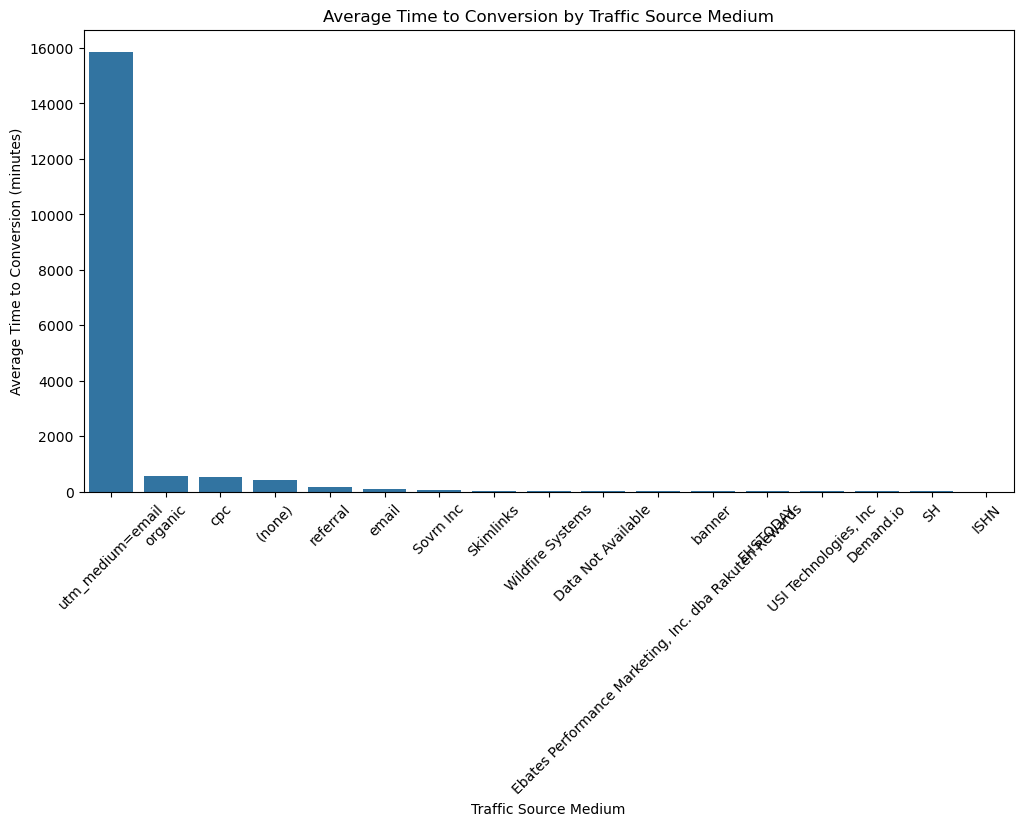

In [246]:
# visualize the average time to conversion by traffic source medium
plt.figure(figsize=(12, 6))
sns.barplot(x='traffic_source_medium', y='time_to_conversion', data=avg_time_to_conversion_source_medium)
plt.xticks(rotation=45)
plt.title('Average Time to Conversion by Traffic Source Medium')
plt.xlabel('Traffic Source Medium')
plt.ylabel('Average Time to Conversion (minutes)')
plt.show()

In [395]:
# group by traffic_source and calculate the average time to conversion
avg_time_to_conversion_source = time_to_conversion.groupby('traffic_source')['time_to_conversion'].mean().reset_index()
avg_time_to_conversion_source = avg_time_to_conversion_source.sort_values(by='time_to_conversion', ascending=False)

In [396]:
avg_time_to_conversion_source

,traffic_source,time_to_conversion
30,utm_source=magento,15871.216239
18,mrcnet,740.529524
7,bing,580.253331
11,google,514.850493
0,(direct),420.779140
22,s1.ariba.com,305.541990
28,tagassistant.google.com,259.304211
12,hs_automation,193.709845
13,hs_email,83.965506
4,app.asana.com,80.682847


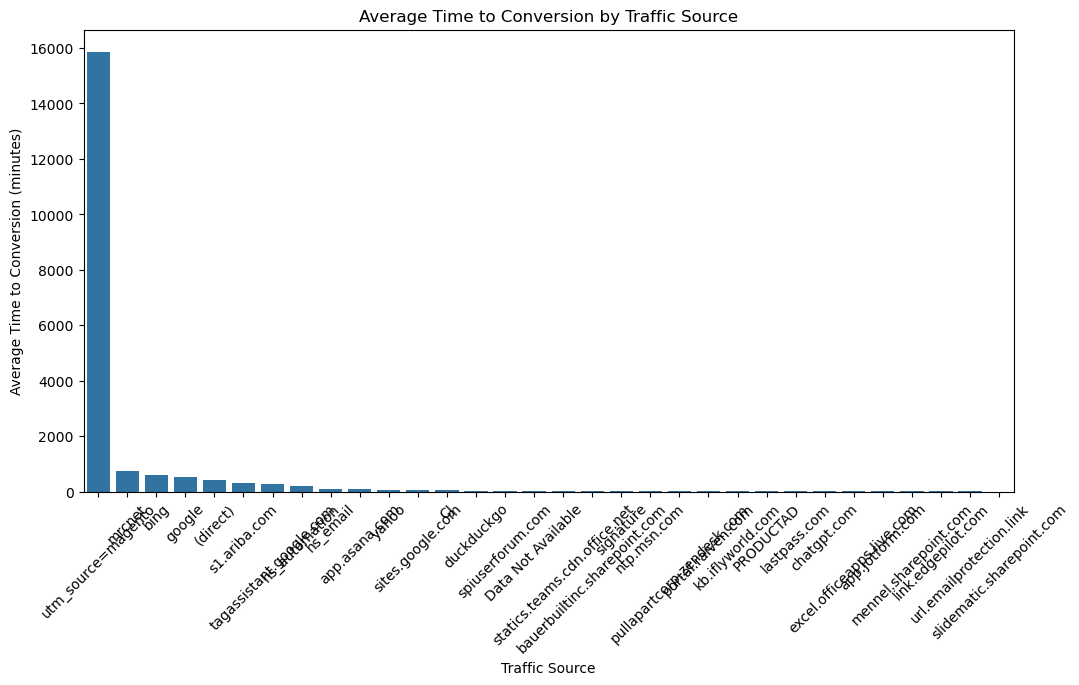

In [249]:
# visualize the average time to conversion by traffic source
plt.figure(figsize=(12, 6))
sns.barplot(x='traffic_source', y='time_to_conversion', data=avg_time_to_conversion_source)
plt.xticks(rotation=45)
plt.title('Average Time to Conversion by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Average Time to Conversion (minutes)')
plt.show()

In [397]:
# group by customer_type and calculate the average time to conversion
avg_time_to_conversion_customer_type = time_to_conversion.groupby('customer_type')['time_to_conversion'].mean().reset_index()
avg_time_to_conversion_customer_type = avg_time_to_conversion_customer_type.sort_values(by='time_to_conversion', ascending=False)

In [398]:
avg_time_to_conversion_customer_type

,customer_type,time_to_conversion


probably the data is limited:

In [214]:
# get the rows with 'event_name' == 'purchase' and 'customer_type' not null
data[(data['event_name'] == 'purchase') & (data['customer_type'].notnull())]

,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items


In [215]:
data[(data['event_name'] == 'purchase')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3982 entries, 44 to 1514908
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_pseudo_id           3982 non-null   object 
 1   event_name               3982 non-null   object 
 2   event_timestamp          3982 non-null   int64  
 3   session_id               3982 non-null   int64  
 4   session_engagement_time  3143 non-null   float64
 5   engaged_session_event    3920 non-null   float64
 6   session_engaged          0 non-null      float64
 7   page_location            3982 non-null   object 
 8   customer_type            0 non-null      object 
 9   traffic_source_name      3920 non-null   object 
 10  traffic_source_medium    3973 non-null   object 
 11  traffic_source           3974 non-null   object 
 12  device_category          3982 non-null   object 
 13  total_item_quantity      3643 non-null   float64
 14  unique_items             

# Identify key behaviors in session 1 vs. return sessions

In [188]:
# group by user_pseudo_id and session_id to identify key behaviors in session 1 vs. return sessions
session_behaviors = data_converted.groupby(['user_pseudo_id', 'session_id']).agg({
    'event_name': lambda x: list(x),
    'event_timestamp': lambda x: list(x)
}).reset_index()
session_behaviors.shape

(5860, 4)

In [189]:
session_behaviors.head(10)

,user_pseudo_id,session_id,event_name,event_timestamp
0,13371422.17444,1752758151,"[view_cart, purchase, page_view, CustomerLogge...","[2025-07-17 13:23:13.631016, 2025-07-17 13:32:..."
1,13525455.169271,1751373445,"[page_view, CustomerLoggedInSession, ad_sort]","[2025-07-01 12:37:47.494435, 2025-07-01 12:37:..."
2,13525455.169271,1752526995,"[add_to_cart, purchase, page_view, page_view, ...","[2025-07-14 21:05:34.533280, 2025-07-14 21:06:..."
3,16907364.175148,1751475455,"[begin_checkout, purchase, add_to_cart, add_sh...","[2025-07-02 16:58:51.900191, 2025-07-02 20:02:..."
4,21130908.175148,1751478507,"[view_item, CustomerLoggedInSession, add_payme...","[2025-07-02 17:48:27.624206, 2025-07-02 17:51:..."
5,21130908.175148,1752074706,"[add_to_cart, add_shipping_info, add_shipping_...","[2025-07-09 15:25:14.602333, 2025-07-09 15:26:..."
6,21212267.17182,1752527823,"[begin_checkout, view_search_results, page_vie...","[2025-07-14 21:18:45.751860, 2025-07-14 21:17:..."
7,28311637.174732,1753194590,"[page_view, page_view, purchase, CustomerLogge...","[2025-07-22 14:29:50.489786, 2025-07-22 14:30:..."
8,30319630.175086,1751379473,"[add_payment_info, page_view, CustomerLoggedIn...","[2025-07-01 14:31:44.629194, 2025-07-01 14:17:..."
9,30319630.175086,1752500060,"[add_to_cart, add_shipping_info, add_payment_i...","[2025-07-14 13:40:28.129904, 2025-07-14 13:41:..."


In [190]:
# keep only the earliest timestamp in event_timestamp and change the column name to 'session_start_time'
session_behaviors['session_start_time'] = session_behaviors['event_timestamp'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)
session_behaviors = session_behaviors.drop(columns=['event_timestamp'])

# sort by user_pseudo_id and session_start_time
session_behaviors = session_behaviors.sort_values(by=['user_pseudo_id', 'session_start_time'])

session_behaviors.head(10)

,user_pseudo_id,session_id,event_name,session_start_time
0,13371422.17444,1752758151,"[view_cart, purchase, page_view, CustomerLogge...",2025-07-17 13:23:13.631016
1,13525455.169271,1751373445,"[page_view, CustomerLoggedInSession, ad_sort]",2025-07-01 12:37:47.494435
2,13525455.169271,1752526995,"[add_to_cart, purchase, page_view, page_view, ...",2025-07-14 21:05:34.533280
3,16907364.175148,1751475455,"[begin_checkout, purchase, add_to_cart, add_sh...",2025-07-02 16:58:51.900191
4,21130908.175148,1751478507,"[view_item, CustomerLoggedInSession, add_payme...",2025-07-02 17:48:27.624206
5,21130908.175148,1752074706,"[add_to_cart, add_shipping_info, add_shipping_...",2025-07-09 15:25:14.602333
6,21212267.17182,1752527823,"[begin_checkout, view_search_results, page_vie...",2025-07-14 21:18:45.751860
7,28311637.174732,1753194590,"[page_view, page_view, purchase, CustomerLogge...",2025-07-22 14:29:50.489786
8,30319630.175086,1751379473,"[add_payment_info, page_view, CustomerLoggedIn...",2025-07-01 14:31:44.629194
9,30319630.175086,1752500060,"[add_to_cart, add_shipping_info, add_payment_i...",2025-07-14 13:40:28.129904


In [191]:
# split the table into two parts: session 1 and return sessions
session_1 = session_behaviors[session_behaviors.groupby('user_pseudo_id')['session_start_time'].transform('min') == session_behaviors['session_start_time']]
return_sessions = session_behaviors[session_behaviors.groupby('user_pseudo_id')['session_start_time'].transform('min') != session_behaviors['session_start_time']]
session_1.shape, return_sessions.shape

((2877, 4), (2983, 4))

In [192]:
session_1.head(10)

,user_pseudo_id,session_id,event_name,session_start_time
0,13371422.17444,1752758151,"[view_cart, purchase, page_view, CustomerLogge...",2025-07-17 13:23:13.631016
1,13525455.169271,1751373445,"[page_view, CustomerLoggedInSession, ad_sort]",2025-07-01 12:37:47.494435
3,16907364.175148,1751475455,"[begin_checkout, purchase, add_to_cart, add_sh...",2025-07-02 16:58:51.900191
4,21130908.175148,1751478507,"[view_item, CustomerLoggedInSession, add_payme...",2025-07-02 17:48:27.624206
6,21212267.17182,1752527823,"[begin_checkout, view_search_results, page_vie...",2025-07-14 21:18:45.751860
7,28311637.174732,1753194590,"[page_view, page_view, purchase, CustomerLogge...",2025-07-22 14:29:50.489786
8,30319630.175086,1751379473,"[add_payment_info, page_view, CustomerLoggedIn...",2025-07-01 14:31:44.629194
10,36332241.17303,1753197862,"[session_start, CustomerLoggedInSession, Custo...",2025-07-22 15:24:22.910767
11,38032802.17513,1751386054,"[page_view, CustomerLoggedInSession, CustomerL...",2025-07-01 16:07:57.108379
12,41079115.175105,1752765908,"[purchase, CustomerLoggedInSession, page_view,...",2025-07-17 15:46:27.074018


In [193]:
return_sessions.head(10)

,user_pseudo_id,session_id,event_name,session_start_time
2,13525455.169271,1752526995,"[add_to_cart, purchase, page_view, page_view, ...",2025-07-14 21:05:34.533280
5,21130908.175148,1752074706,"[add_to_cart, add_shipping_info, add_shipping_...",2025-07-09 15:25:14.602333
9,30319630.175086,1752500060,"[add_to_cart, add_shipping_info, add_payment_i...",2025-07-14 13:40:28.129904
13,41079115.175105,1753192311,[session_start],2025-07-22 13:51:51.978811
16,58673121.173583,1752767499,"[add_shipping_info, add_shipping_info, purchas...",2025-07-17 15:53:21.746189
26,105880364.17484,1751522451,"[page_view, page_view, CustomerLoggedInSession...",2025-07-02 16:23:50.061274
27,105880364.17484,1752578095,[CustomerLoggedInSession],2025-07-14 21:16:04.048744
28,105880364.17484,1752831717,"[begin_checkout, purchase, page_view, Customer...",2025-07-17 19:44:42.486865
29,105880364.17484,1753154775,"[session_start, page_view]",2025-07-21 13:27:29.067655
31,119240006.175035,1752774890,"[page_view, page_view, CustomerLoggedInSession...",2025-07-17 17:55:19.612131


In [194]:
# compute word frequency for session 1 and return sessions
def get_word_frequency(session_df):
    # Flatten the list of event names into a single list
    all_events = [event for sublist in session_df['event_name'] for event in sublist]
    
    # Count the frequency of each event name
    word_freq = pd.Series(all_events).value_counts().reset_index()
    word_freq.columns = ['event_name', 'frequency']
    
    return word_freq

session_1_word_freq = get_word_frequency(session_1)
return_sessions_word_freq = get_word_frequency(return_sessions)

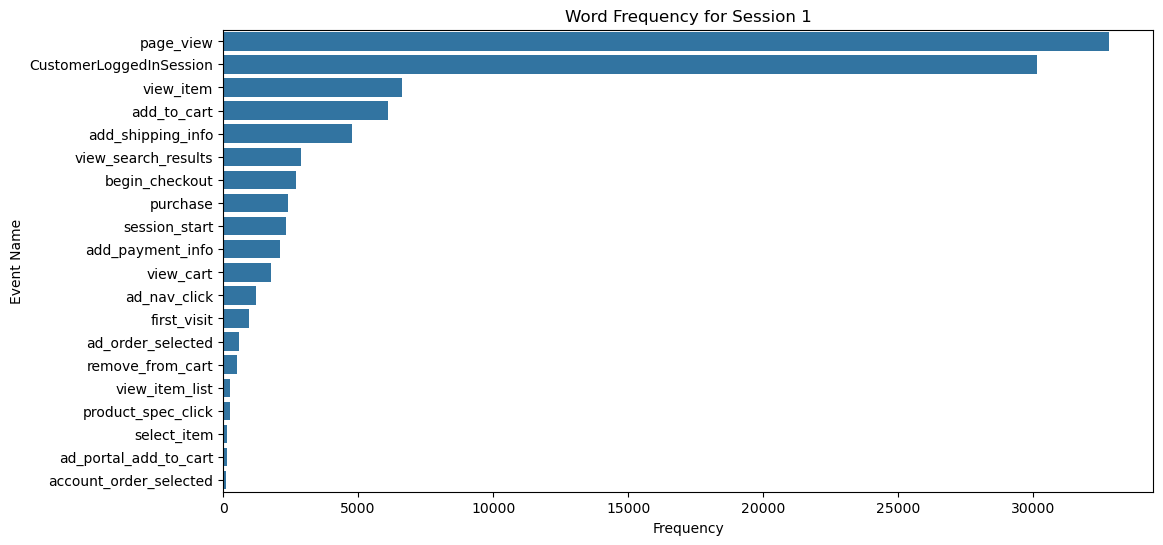

In [195]:
# visualize the word frequency for session 1
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='event_name', data=session_1_word_freq.head(20))
plt.title('Word Frequency for Session 1')
plt.xlabel('Frequency')
plt.ylabel('Event Name')
plt.show()

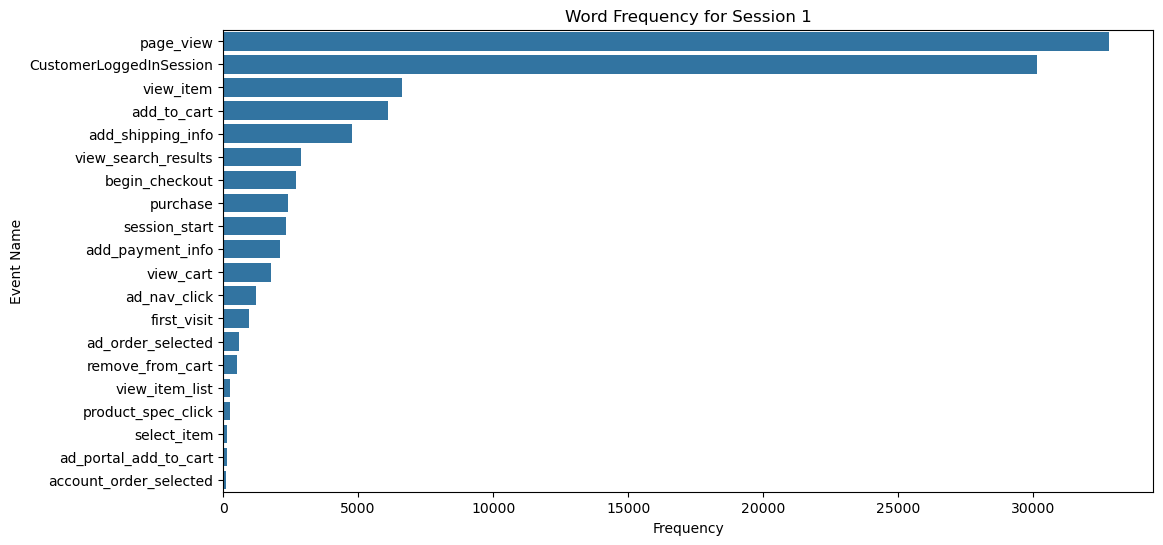

In [196]:
# visualize the word frequency for session 1
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='event_name', data=session_1_word_freq.head(20))
plt.title('Word Frequency for Session 1')
plt.xlabel('Frequency')
plt.ylabel('Event Name')
plt.show()

In [202]:
# merge session_1_word_freq and return_sessions_word_freq for comparison
# merge session_1_word_freq and return_sessions_word_freq for comparison
session_word_freq = pd.merge(
    session_1_word_freq, 
    return_sessions_word_freq, 
    on='event_name', 
    suffixes=('_session_1', '_return_sessions')
)

# calculate total frequencies for each part
total_session_1 = session_1_word_freq['frequency'].sum()
total_return_sessions = return_sessions_word_freq['frequency'].sum()

# add percentage columns
session_word_freq['percent_session_1'] = session_word_freq['frequency_session_1'] / total_session_1 * 100
session_word_freq['percent_return_sessions'] = session_word_freq['frequency_return_sessions'] / total_return_sessions * 100
session_word_freq['percent_diff'] = session_word_freq['percent_session_1'] - session_word_freq['percent_return_sessions']

# move column percent_diff to the second position
session_word_freq = session_word_freq[['event_name', 'percent_diff', 'frequency_session_1', 'frequency_return_sessions', 
                                       'percent_session_1', 'percent_return_sessions']]

# add a column for the absolute difference in percentages into the third position
session_word_freq['abs_percent_diff'] = session_word_freq['percent_diff'].abs()
session_word_freq = session_word_freq[['event_name', 'percent_diff', 'abs_percent_diff', 'frequency_session_1', 'frequency_return_sessions', 
                                       'percent_session_1', 'percent_return_sessions']]
session_word_freq = session_word_freq.sort_values(by='abs_percent_diff', ascending=False)

session_word_freq

,event_name,percent_diff,abs_percent_diff,frequency_session_1,frequency_return_sessions,percent_session_1,percent_return_sessions
1,CustomerLoggedInSession,-2.983603,2.983603,30143,29585,30.410307,33.393909
12,first_visit,0.961211,0.961211,955,2,0.963469,0.002257
4,add_shipping_info,0.931916,0.931916,4768,3436,4.810282,3.878366
3,add_to_cart,0.765897,0.765897,6087,4762,6.140979,5.375082
7,purchase,0.614233,0.614233,2390,1592,2.411194,1.796961
8,session_start,-0.513902,0.513902,2319,2528,2.339565,2.853466
0,page_view,-0.481023,0.481023,32797,29740,33.087842,33.568865
13,ad_order_selected,-0.453711,0.453711,574,915,0.579090,1.032801
6,begin_checkout,0.413982,0.413982,2714,2059,2.738068,2.324085
9,add_payment_info,0.371066,0.371066,2121,1567,2.139809,1.768743


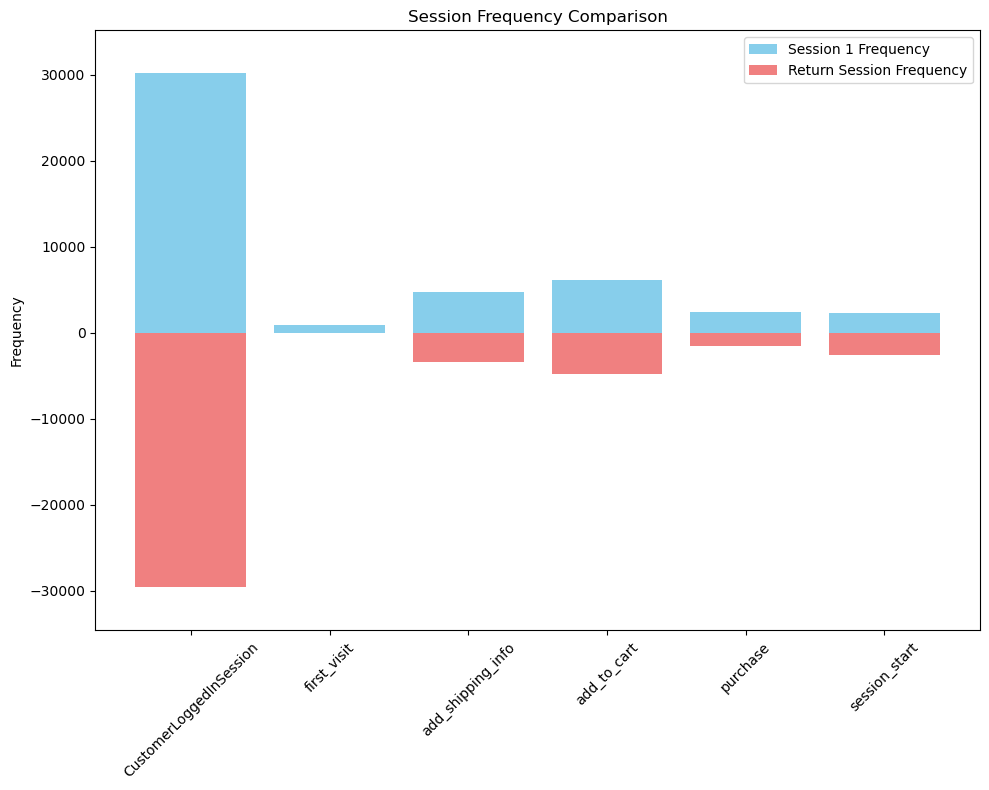

In [203]:
# get the events with a percentage difference greater than 0.5%
significant_events = session_word_freq[session_word_freq['abs_percent_diff'] > 0.5]

# visualize the significant events
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(significant_events['event_name'], significant_events['frequency_session_1'], color='skyblue', label='Session 1 Frequency')
ax.bar(significant_events['event_name'], -significant_events['frequency_return_sessions'], color='lightcoral', label='Return Session Frequency')

ax.set_title('Session Frequency Comparison')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([-max(significant_events['frequency_return_sessions'])-5000, max(significant_events['frequency_session_1'])+5000])
ax.legend()

plt.tight_layout()
plt.show()


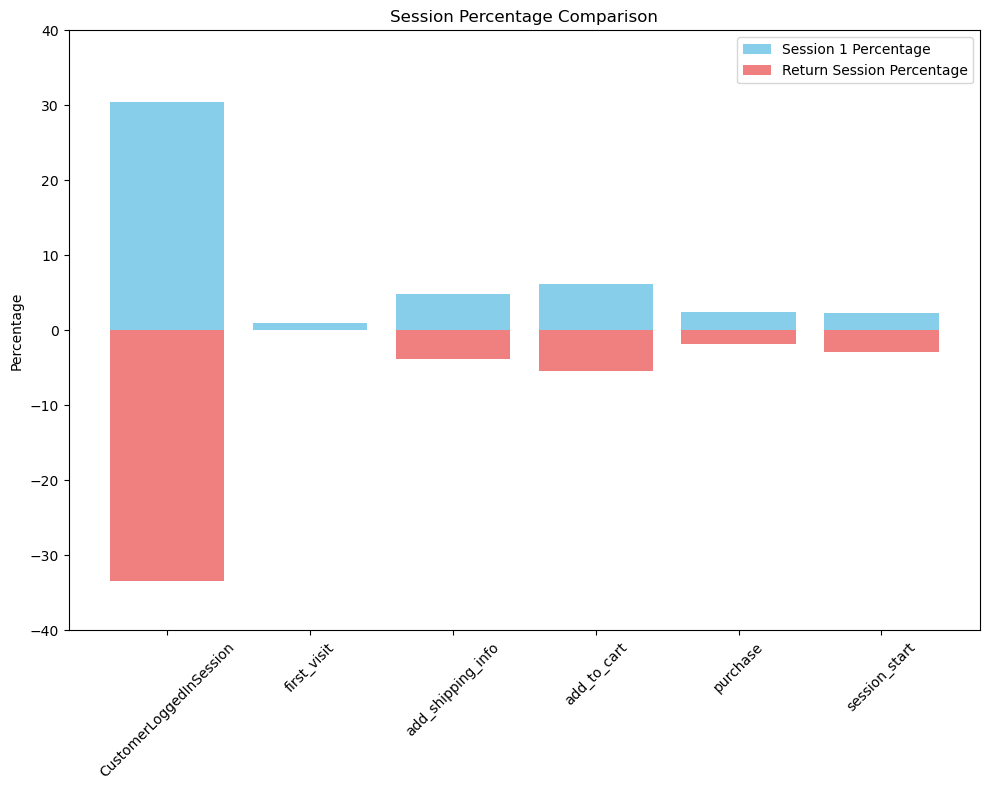

In [211]:
# visualize the session percentage comparison
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(significant_events['event_name'], significant_events['percent_session_1'], color='skyblue', label='Session 1 Percentage')
ax.bar(significant_events['event_name'], -significant_events['percent_return_sessions'], color='lightcoral', label='Return Session Percentage')

ax.set_title('Session Percentage Comparison')
ax.set_ylabel('Percentage')
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([-40, 40])
ax.legend()

plt.tight_layout()
plt.show()

# Time-to-Conversion Model

In [217]:
data_converted.head()

,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items
0,220115309.1752422794,begin_checkout,2025-07-13 16:11:36.054409,1752422794,5559.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,10.0,1.0
1,220115309.1752422794,add_shipping_info,2025-07-13 16:12:06.644026,1752422794,382.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,10.0,1.0
2,220115309.1752422794,begin_checkout,2025-07-13 16:16:53.716235,1752422794,15.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,10.0,1.0
3,220115309.1752422794,view_cart,2025-07-13 16:17:09.261180,1752422794,1.0,1.0,NaN,https://www.magidglove.com/checkout/cart/,NaN,(direct),(none),(direct),mobile,10.0,1.0
4,220115309.1752422794,add_shipping_info,2025-07-13 16:19:11.093026,1752422794,17648.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,(direct),(none),(direct),mobile,12.0,1.0


### Data Preprocessing

In [416]:
# for each user_pseudo_id, drop the purchase events that ordered before the first_visit and session_start events
time_to_conversion_model = data_converted.groupby('user_pseudo_id', group_keys=False).apply(filter_purchase_after_first_event)
time_to_conversion_model.shape

C:\Users\laptop\AppData\Local\Temp\ipykernel_36176\4092200824.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_to_conversion_model = data_converted.groupby('user_pseudo_id', group_keys=False).apply(filter_purchase_after_first_event)


(176592, 15)

In [417]:
# sort by user_pseudo_id and event_timestamp again
time_to_conversion_model = time_to_conversion_model.sort_values(by=['user_pseudo_id', 'event_timestamp'])
time_to_conversion_model.head(20)

,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items
1380278,21130908.175148,first_visit,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN
1380279,21130908.175148,page_view,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN
1052401,21130908.175148,view_item,2025-07-02 17:48:27.624206,1751478507,3.0,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,6.0,6.0
1382450,21130908.175148,add_shipping_info,2025-07-02 17:50:42.917300,1751478507,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0
1054563,21130908.175148,add_payment_info,2025-07-02 17:51:28.999913,1751478507,33446.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0
1382451,21130908.175148,purchase,2025-07-02 17:51:37.403397,1751478507,1.0,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0
1052402,21130908.175148,CustomerLoggedInSession,2025-07-02 17:51:42.380281,1751478507,NaN,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,notLoggedIn,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN
1439886,21130908.175148,add_to_cart,2025-07-09 15:25:14.602333,1752074706,8358.0,1.0,NaN,https://www.magidglove.com/magid-apst-5-8-repl...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0
1439887,21130908.175148,add_shipping_info,2025-07-09 15:26:11.703773,1752074706,41100.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0
1439888,21130908.175148,add_shipping_info,2025-07-09 15:26:11.704475,1752074706,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0


In [418]:
# list converted users again
converted_users_2 = time_to_conversion_model[time_to_conversion_model['event_name'] == 'purchase']['user_pseudo_id'].unique()
converted_users_2.shape

(2499,)

In [419]:
# keep only the users who have been converted
time_to_conversion_model = time_to_conversion_model[time_to_conversion_model['user_pseudo_id'].isin(converted_users_2)]
time_to_conversion_model.shape

(173836, 15)

In [436]:
time_to_conversion_model.head(20)

,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items
1380278,21130908.175148,first_visit,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN
1380279,21130908.175148,page_view,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN
1052401,21130908.175148,view_item,2025-07-02 17:48:27.624206,1751478507,3.0,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,6.0,6.0
1382450,21130908.175148,add_shipping_info,2025-07-02 17:50:42.917300,1751478507,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0
1054563,21130908.175148,add_payment_info,2025-07-02 17:51:28.999913,1751478507,33446.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0
1382451,21130908.175148,purchase,2025-07-02 17:51:37.403397,1751478507,1.0,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0
1052402,21130908.175148,CustomerLoggedInSession,2025-07-02 17:51:42.380281,1751478507,NaN,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,notLoggedIn,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN
1439886,21130908.175148,add_to_cart,2025-07-09 15:25:14.602333,1752074706,8358.0,1.0,NaN,https://www.magidglove.com/magid-apst-5-8-repl...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0
1439887,21130908.175148,add_shipping_info,2025-07-09 15:26:11.703773,1752074706,41100.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0
1439888,21130908.175148,add_shipping_info,2025-07-09 15:26:11.704475,1752074706,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0


In [421]:
# check how many unique users are in the time_to_convertion and time_to_convertion_model dataset
time_to_conversion_w_na['user_pseudo_id'].nunique(), time_to_conversion_model['user_pseudo_id'].nunique()

(2499, 2499)

In [423]:
# check how many unique sessions are in the time_to_convertion and time_to_convertion_model dataset
time_to_conversion_w_na['session_id'].nunique(), time_to_conversion_model['session_id'].nunique()

(4924, 5058)

In [435]:
time_to_conversion_w_na.head()

,user_pseudo_id,session_id,customer_type,traffic_source_medium,traffic_source,time_to_conversion,event_timestamp,event_name
1380278,21130908.175148,1751478507,NaN,cpc,google,NaN,2025-07-02 17:48:27.619528,first_visit
1382451,21130908.175148,1751478507,NaN,cpc,google,3.163064,2025-07-02 17:51:37.403397,purchase
1429507,21212267.17182,1752527823,NaN,(none),(direct),NaN,2025-07-14 21:17:03.428617,session_start
1427689,21212267.17182,1752527823,NaN,(none),(direct),4.365602,2025-07-14 21:21:25.364755,purchase
1068740,36332241.17303,1753197862,NaN,email,hs_email,NaN,2025-07-22 15:24:22.910767,session_start


In [432]:
time_to_conversion_model.shape, time_to_conversion_w_na.shape

((173836, 15), (9248, 8))

In [441]:
# join time_to_conversion_w_na and time_to_conversion_model on user_pseudo_id, session_id, and event_name
time_to_conversion_combined = pd.merge(
    time_to_conversion_w_na[['time_to_conversion']], 
    time_to_conversion_model, 
    left_index=True, 
    right_index=True, 
    how = 'right',
    suffixes=('_w_na', '_model')
)

time_to_conversion_combined.shape

(173836, 16)

In [444]:
# sort by user_pseudo_id, session_id, and event_timestamp
time_to_conversion_combined = time_to_conversion_combined.sort_values(by=['user_pseudo_id', 'session_id', 'event_timestamp'])
time_to_conversion_combined.head(40)

,time_to_conversion,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items
1380278,NaN,21130908.175148,first_visit,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN
1380279,NaN,21130908.175148,page_view,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN
1052401,NaN,21130908.175148,view_item,2025-07-02 17:48:27.624206,1751478507,3.0,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,6.0,6.0
1382450,NaN,21130908.175148,add_shipping_info,2025-07-02 17:50:42.917300,1751478507,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0
1054563,NaN,21130908.175148,add_payment_info,2025-07-02 17:51:28.999913,1751478507,33446.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0
1382451,3.163064,21130908.175148,purchase,2025-07-02 17:51:37.403397,1751478507,1.0,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0
1052402,NaN,21130908.175148,CustomerLoggedInSession,2025-07-02 17:51:42.380281,1751478507,NaN,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,notLoggedIn,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN
1439886,NaN,21130908.175148,add_to_cart,2025-07-09 15:25:14.602333,1752074706,8358.0,1.0,NaN,https://www.magidglove.com/magid-apst-5-8-repl...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0
1439887,NaN,21130908.175148,add_shipping_info,2025-07-09 15:26:11.703773,1752074706,41100.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0
1439888,NaN,21130908.175148,add_shipping_info,2025-07-09 15:26:11.704475,1752074706,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0


In [452]:
# group by user_pseudo_id and session_id to identify key behaviors in session 1 vs. return sessions
session_behaviors_model = time_to_conversion_combined.groupby(['user_pseudo_id', 'session_id']).agg({
    'event_name': lambda x: list(x),
    'event_timestamp': lambda x: list(x)
}).reset_index()
session_behaviors_model.shape

(5178, 4)

In [453]:
# keep only the earliest timestamp in event_timestamp and change the column name to 'session_start_time'
session_behaviors_model['session_start_time'] = session_behaviors_model['event_timestamp'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)
session_behaviors_model = session_behaviors_model.drop(columns=['event_timestamp'])

# sort by user_pseudo_id and session_start_time
session_behaviors_model = session_behaviors_model.sort_values(by=['user_pseudo_id', 'session_start_time'])

session_behaviors_model.head(10)

,user_pseudo_id,session_id,event_name,session_start_time
0,21130908.175148,1751478507,"[first_visit, page_view, view_item, add_shippi...",2025-07-02 17:48:27.619528
1,21130908.175148,1752074706,"[add_to_cart, add_shipping_info, add_shipping_...",2025-07-09 15:25:14.602333
2,21212267.17182,1752527823,"[session_start, page_view, view_search_results...",2025-07-14 21:17:03.428617
3,36332241.17303,1753197862,"[session_start, CustomerLoggedInSession, Custo...",2025-07-22 15:24:22.910767
4,58673121.173583,1751476498,"[page_view, session_start, page_view, page_vie...",2025-07-02 17:14:59.621359
5,58673121.173583,1752767499,"[CustomerLoggedInSession, add_shipping_info, a...",2025-07-17 15:52:13.658996
6,60443857.175319,1753190697,"[session_start, page_view, first_visit, Custom...",2025-07-22 13:24:57.637186
7,70743951.174852,1752497624,"[session_start, page_view, page_view, page_vie...",2025-07-14 12:53:44.873287
8,71127573.175146,1751462693,"[session_start, page_view, ad_nav_click, add_t...",2025-07-02 13:16:27.251351
9,104673112.175319,1753193753,"[session_start, page_view, CustomerLoggedInSes...",2025-07-22 14:15:53.683831


In [449]:
# split the table into two parts: session 1 and return sessions
session_1_model = session_behaviors_model[session_behaviors_model.groupby('user_pseudo_id')['session_start_time'].transform('min') == session_behaviors_model['session_start_time']]
return_sessions_model = session_behaviors_model[session_behaviors_model.groupby('user_pseudo_id')['session_start_time'].transform('min') != session_behaviors_model['session_start_time']]
session_1_model.shape, return_sessions_model.shape

((2499, 4), (2679, 4))

In [454]:
time_to_conversion_combined.shape

(173836, 16)

In [456]:
# add a column 'initial_session' to session_1_model and set all values to 1
session_1_model['initial_session'] = 1

# join session_1_model and time_to_conversion_combined on user_pseudo_id, session_id, and session_start_time (for session_1_model) == event_timestamp (for time_to_conversion_combined)
time_to_conversion_combined = pd.merge(
    time_to_conversion_combined, 
    session_1_model[['user_pseudo_id', 'session_id', 'initial_session', 'session_start_time']], 
    left_on=['user_pseudo_id', 'session_id', 'event_timestamp'],
    right_on=['user_pseudo_id', 'session_id', 'session_start_time'], 
    how='left'
)

time_to_conversion_combined.shape

(173836, 18)

In [457]:
time_to_conversion_combined.head(10)

,time_to_conversion,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items,initial_session,session_start_time
0,NaN,21130908.175148,first_visit,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN,1.0,2025-07-02 17:48:27.619528
1,NaN,21130908.175148,page_view,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN,1.0,2025-07-02 17:48:27.619528
2,NaN,21130908.175148,view_item,2025-07-02 17:48:27.624206,1751478507,3.0,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,6.0,6.0,NaN,NaT
3,NaN,21130908.175148,add_shipping_info,2025-07-02 17:50:42.917300,1751478507,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0,NaN,NaT
4,NaN,21130908.175148,add_payment_info,2025-07-02 17:51:28.999913,1751478507,33446.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0,NaN,NaT
5,3.163064,21130908.175148,purchase,2025-07-02 17:51:37.403397,1751478507,1.0,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0,NaN,NaT
6,NaN,21130908.175148,CustomerLoggedInSession,2025-07-02 17:51:42.380281,1751478507,NaN,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,notLoggedIn,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN,NaN,NaT
7,NaN,21130908.175148,add_to_cart,2025-07-09 15:25:14.602333,1752074706,8358.0,1.0,NaN,https://www.magidglove.com/magid-apst-5-8-repl...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0,NaN,NaT
8,NaN,21130908.175148,add_shipping_info,2025-07-09 15:26:11.703773,1752074706,41100.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0,NaN,NaT
9,NaN,21130908.175148,add_shipping_info,2025-07-09 15:26:11.704475,1752074706,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0,NaN,NaT


In [458]:
# drop the 'session_start_time' column from time_to_conversion_combined
time_to_conversion_combined = time_to_conversion_combined.drop(columns=['session_start_time'])

# if there is a non-null time_to conversion, set all rows with the same session_id and user_pseudo_id to the same time_to_conversion value
time_to_conversion_combined['time_to_conversion'] = time_to_conversion_combined.groupby(['user_pseudo_id', 'session_id'])['time_to_conversion'].transform(lambda x: x.ffill().bfill() if x.notnull().any() else np.nan)

time_to_conversion_combined.shape

(173836, 17)

In [459]:
time_to_conversion_combined.head(10)

,time_to_conversion,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items,initial_session
0,3.163064,21130908.175148,first_visit,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN,1.0
1,3.163064,21130908.175148,page_view,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN,1.0
2,3.163064,21130908.175148,view_item,2025-07-02 17:48:27.624206,1751478507,3.0,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,6.0,6.0,NaN
3,3.163064,21130908.175148,add_shipping_info,2025-07-02 17:50:42.917300,1751478507,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0,NaN
4,3.163064,21130908.175148,add_payment_info,2025-07-02 17:51:28.999913,1751478507,33446.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0,NaN
5,3.163064,21130908.175148,purchase,2025-07-02 17:51:37.403397,1751478507,1.0,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0,NaN
6,3.163064,21130908.175148,CustomerLoggedInSession,2025-07-02 17:51:42.380281,1751478507,NaN,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,notLoggedIn,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN,NaN
7,NaN,21130908.175148,add_to_cart,2025-07-09 15:25:14.602333,1752074706,8358.0,1.0,NaN,https://www.magidglove.com/magid-apst-5-8-repl...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0,NaN
8,NaN,21130908.175148,add_shipping_info,2025-07-09 15:26:11.703773,1752074706,41100.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0,NaN
9,NaN,21130908.175148,add_shipping_info,2025-07-09 15:26:11.704475,1752074706,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0,NaN


In [ ]:
# fill na values in time_to_conversion with the same next non-null value
time_to_conversion_combined['time_to_conversion'] = time_to_conversion_combined.groupby(['user_pseudo_id'])['time_to_conversion'].transform(lambda x: x.ffill().bfill() if x.notnull().any() else np.nan)

time_to_conversion_combined[5:15]

,time_to_conversion,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items,initial_session
5,3.163064,21130908.175148,purchase,2025-07-02 17:51:37.403397,1751478507,1.0,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,10.0,1.0,NaN
6,3.163064,21130908.175148,CustomerLoggedInSession,2025-07-02 17:51:42.380281,1751478507,NaN,1.0,NaN,https://www.magidglove.com/checkout/onepage/su...,notLoggedIn,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN,NaN
7,3.163064,21130908.175148,add_to_cart,2025-07-09 15:25:14.602333,1752074706,8358.0,1.0,NaN,https://www.magidglove.com/magid-apst-5-8-repl...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0,NaN
8,3.163064,21130908.175148,add_shipping_info,2025-07-09 15:26:11.703773,1752074706,41100.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0,NaN
9,3.163064,21130908.175148,add_shipping_info,2025-07-09 15:26:11.704475,1752074706,6.0,1.0,NaN,https://www.magidglove.com/checkout/,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,2.0,1.0,NaN
10,4.365602,21212267.17182,session_start,2025-07-14 21:17:03.428617,1752527823,NaN,1.0,1.0,https://www.magidglove.com/sales/orders/history/,NaN,(direct),(none),(direct),desktop,NaN,NaN,1.0
11,4.365602,21212267.17182,page_view,2025-07-14 21:17:17.001254,1752527823,NaN,1.0,NaN,https://www.magidglove.com/catalogsearch/resul...,NaN,(direct),(none),(direct),desktop,NaN,NaN,NaN
12,4.365602,21212267.17182,view_search_results,2025-07-14 21:17:17.001609,1752527823,1.0,1.0,NaN,https://www.magidglove.com/catalogsearch/resul...,NaN,(direct),(none),(direct),desktop,NaN,NaN,NaN
13,4.365602,21212267.17182,add_to_cart,2025-07-14 21:17:37.288278,1752527823,13235.0,1.0,NaN,https://www.magidglove.com/magid-d-roc-aerodex...,NaN,(direct),(none),(direct),desktop,6.0,1.0,NaN
14,4.365602,21212267.17182,add_to_cart,2025-07-14 21:17:47.631104,1752527823,10325.0,1.0,NaN,https://www.magidglove.com/magid-d-roc-aerodex...,NaN,(direct),(none),(direct),desktop,15.0,1.0,NaN


In [463]:
time_to_conversion_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173836 entries, 0 to 173835
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   time_to_conversion       173836 non-null  float64       
 1   user_pseudo_id           173836 non-null  object        
 2   event_name               173836 non-null  object        
 3   event_timestamp          173836 non-null  datetime64[ns]
 4   session_id               173836 non-null  int64         
 5   session_engagement_time  102745 non-null  float64       
 6   engaged_session_event    172742 non-null  float64       
 7   session_engaged          4407 non-null    float64       
 8   page_location            173836 non-null  object        
 9   customer_type            55154 non-null   object        
 10  traffic_source_name      171112 non-null  object        
 11  traffic_source_medium    173347 non-null  object        
 12  traffic_source  

In [464]:
# drop rows with NaN values in initial_session
time_to_conversion_combined = time_to_conversion_combined.dropna(subset=['initial_session'])
time_to_conversion_combined.shape

(5584, 17)

In [466]:
time_to_conversion_combined.head()

,time_to_conversion,user_pseudo_id,event_name,event_timestamp,session_id,session_engagement_time,engaged_session_event,session_engaged,page_location,customer_type,traffic_source_name,traffic_source_medium,traffic_source,device_category,total_item_quantity,unique_items,initial_session
0,3.163064,21130908.175148,first_visit,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN,1.0
1,3.163064,21130908.175148,page_view,2025-07-02 17:48:27.619528,1751478507,NaN,1.0,NaN,https://www.magidglove.com/3m-peltor-over-the-...,NaN,PMax_3M_Maximize Conversion Value_Target ROAS,cpc,google,desktop,NaN,NaN,1.0
10,4.365602,21212267.17182,session_start,2025-07-14 21:17:03.428617,1752527823,NaN,1.0,1.0,https://www.magidglove.com/sales/orders/history/,NaN,(direct),(none),(direct),desktop,NaN,NaN,1.0
22,9.626593,36332241.17303,session_start,2025-07-22 15:24:22.910767,1753197862,NaN,1.0,1.0,https://www.magidglove.com/?gad_source=1&gad_c...,NaN,Product Spotlight Week 5 Email - 103024 - Insi...,email,hs_email,desktop,NaN,NaN,1.0
34,9.626593,58673121.173583,page_view,2025-07-02 17:14:59.621359,1751476498,NaN,1.0,NaN,https://www.magidglove.com/work-gloves,NaN,(direct),(none),(direct),desktop,NaN,NaN,1.0


In [467]:
time_to_conversion_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5584 entries, 0 to 173787
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time_to_conversion       5584 non-null   float64       
 1   user_pseudo_id           5584 non-null   object        
 2   event_name               5584 non-null   object        
 3   event_timestamp          5584 non-null   datetime64[ns]
 4   session_id               5584 non-null   int64         
 5   session_engagement_time  0 non-null      float64       
 6   engaged_session_event    5475 non-null   float64       
 7   session_engaged          2368 non-null   float64       
 8   page_location            5584 non-null   object        
 9   customer_type            0 non-null      object        
 10  traffic_source_name      5492 non-null   object        
 11  traffic_source_medium    5575 non-null   object        
 12  traffic_source           5578 non-nul

### Feature Engineering

In [ ]:
input = time_to_conversion_combined[['time_to_conversion', 'event_name', 
                                     'traffic_source_medium', 'traffic_source', 
                                     'device_category']]

input.head()

,time_to_conversion,event_name,traffic_source_medium,traffic_source,device_category
0,3.163064,first_visit,cpc,google,desktop
1,3.163064,page_view,cpc,google,desktop
10,4.365602,session_start,(none),(direct),desktop
22,9.626593,session_start,email,hs_email,desktop
34,9.626593,page_view,(none),(direct),desktop


In [ ]:
# one hot encode the categorical variables
input = pd.get_dummies(input, columns=['event_name', 'traffic_source_medium', 'traffic_source', 'device_category'], drop_first=True)

input.head()

,time_to_conversion,event_name_page_view,event_name_session_start,traffic_source_medium_Data Not Available,traffic_source_medium_EHSTODAY,"traffic_source_medium_Ebates Performance Marketing, Inc. dba Rakuten Rewards",traffic_source_medium_ISHN,traffic_source_medium_SH,traffic_source_medium_Skimlinks,traffic_source_medium_Sovrn Inc,...,traffic_source_sites.google.com,traffic_source_slidematic.sharepoint.com,traffic_source_spiuserforum.com,traffic_source_statics.teams.cdn.office.net,traffic_source_tagassistant.google.com,traffic_source_url.emailprotection.link,traffic_source_utm_source=magento,traffic_source_yahoo,device_category_mobile,device_category_tablet
0,3.163064,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.163064,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,4.365602,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,9.626593,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,9.626593,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [489]:
#replace False with 0 and True with 1 for all boolean columns
input = input.replace({False: 0, True: 1})
input.head()

C:\Users\laptop\AppData\Local\Temp\ipykernel_36176\3521495735.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input = input.replace({False: 0, True: 1})


,time_to_conversion,event_name_page_view,event_name_session_start,traffic_source_medium_Data Not Available,traffic_source_medium_EHSTODAY,"traffic_source_medium_Ebates Performance Marketing, Inc. dba Rakuten Rewards",traffic_source_medium_ISHN,traffic_source_medium_SH,traffic_source_medium_Skimlinks,traffic_source_medium_Sovrn Inc,...,traffic_source_sites.google.com,traffic_source_slidematic.sharepoint.com,traffic_source_spiuserforum.com,traffic_source_statics.teams.cdn.office.net,traffic_source_tagassistant.google.com,traffic_source_url.emailprotection.link,traffic_source_utm_source=magento,traffic_source_yahoo,device_category_mobile,device_category_tablet
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [484]:
# round to an int
input['time_to_conversion'] = input['time_to_conversion'].round().astype(int)

input.describe()

,time_to_conversion
count,5584.000000
mean,108.061426
std,1045.424835
min,0.000000
25%,5.000000
50%,10.000000
75%,24.000000
max,23380.000000


# Training

In [490]:
# set y as time_to_conversion and X as the rest of the input
y = input['time_to_conversion']
X = input.drop(columns=['time_to_conversion'])

# split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 4467, number of used features: 11
[LightGBM] [Info] Start training from score 115.302440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

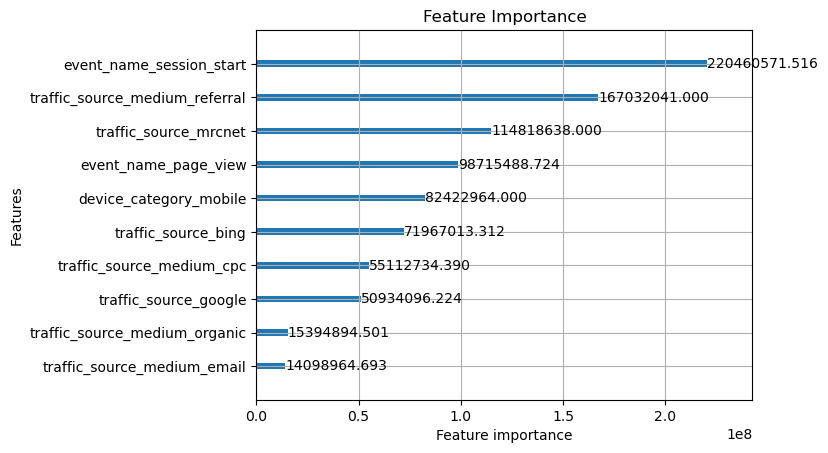

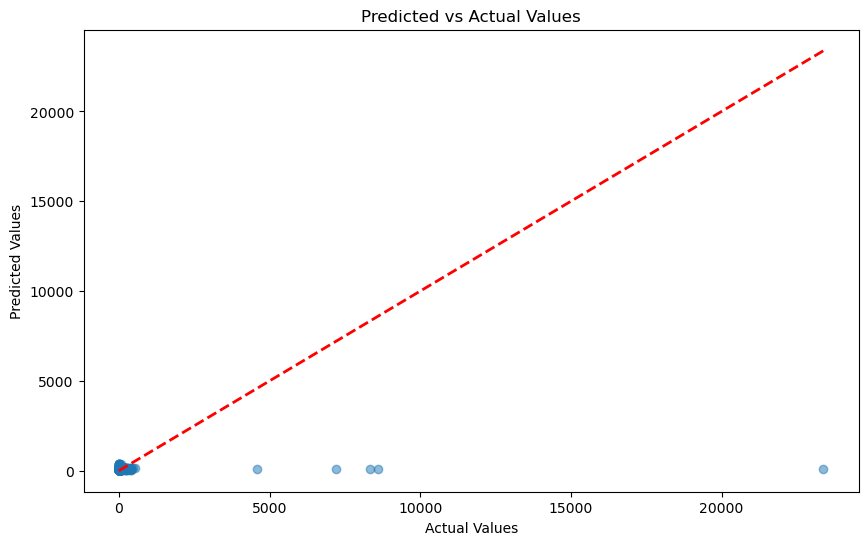

['lightgbm_time_to_conversion_model.pkl']

In [492]:
# lightgbm regression model with hypertunning
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Define the LightGBM model
lgb_model = lgb.LGBMRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid,
                            scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)
# Remove special JSON characters from feature names in X_train and X_val
def clean_feature_names(df):
    df.columns = df.columns.str.replace(r'[^\w]', '_', regex=True)
    return df

X_train = clean_feature_names(X_train)
X_val = clean_feature_names(X_val)

grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (MSE):", -best_score)

# Train the model with the best parameters
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = best_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
print("Validation MSE:", mse)
print("Validation MAE:", mae)

# Visualize feature importance
lgb.plot_importance(best_model, max_num_features=10, importance_type='gain')
plt.title('Feature Importance')
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Save the model
import joblib
joblib.dump(best_model, 'lightgbm_time_to_conversion_model.pkl')